In [288]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import xgboost
from xgboost import XGBClassifier, plot_importance, plot_tree
os.environ["PATH"]+=os.pathsep + r"C:\Users\r.bourget\Anaconda3\Library\bin\graphviz"

os.getcwd()

'C:\\Users\\r.bourget'

In [268]:
path = r"C:\Users\r.bourget\Desktop\occupancy_data"
df_train= pd.read_csv(os.path.abspath(path + "/datatraining.txt"))
df_test = pd.read_csv(os.path.abspath(path + "/datatest.txt"))
df_validation = pd.read_csv(os.path.abspath(path + "/datatest2.txt"))

In [269]:
df_train.set_index("date",inplace=True)
df_test.set_index("date",inplace=True)
df_validation.set_index("date",inplace=True)
df_train.head(10)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1
2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1
2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1


In [22]:
df_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [23]:
df_validation.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [107]:
timeline = list(df_train.index)

In [111]:
occupancy_signal.values

array([27.272 , 27.2675, 27.245 , ..., 36.095 , 36.26  , 36.2   ])

In [121]:
occupancy_signal = df_train["Humidity"] * df_train["Occupancy"]
occupancy_signal[occupancy_signal==0] = np.nan
occupancy_signal.head(20)

date
2015-02-04 17:51:00    27.272000
2015-02-04 17:51:59    27.267500
2015-02-04 17:53:00    27.245000
2015-02-04 17:54:00    27.200000
2015-02-04 17:55:00    27.200000
2015-02-04 17:55:59    27.200000
2015-02-04 17:57:00    27.200000
2015-02-04 17:57:59    27.200000
2015-02-04 17:58:59    27.200000
2015-02-04 18:00:00    27.175000
2015-02-04 18:01:00    27.150000
2015-02-04 18:02:00    27.100000
2015-02-04 18:03:00    27.166667
2015-02-04 18:04:00    27.150000
2015-02-04 18:04:59    27.125000
2015-02-04 18:06:00    27.125000
2015-02-04 18:07:00          NaN
2015-02-04 18:08:00          NaN
2015-02-04 18:08:59          NaN
2015-02-04 18:10:00          NaN
dtype: float64

C:\Users\r.bourget\Anaconda3\lib\site-packages\matplotlib\ticker.py:1437: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  str(type(self)))


Text(0.5, 1.0, 'Humidity time series (Training set)')

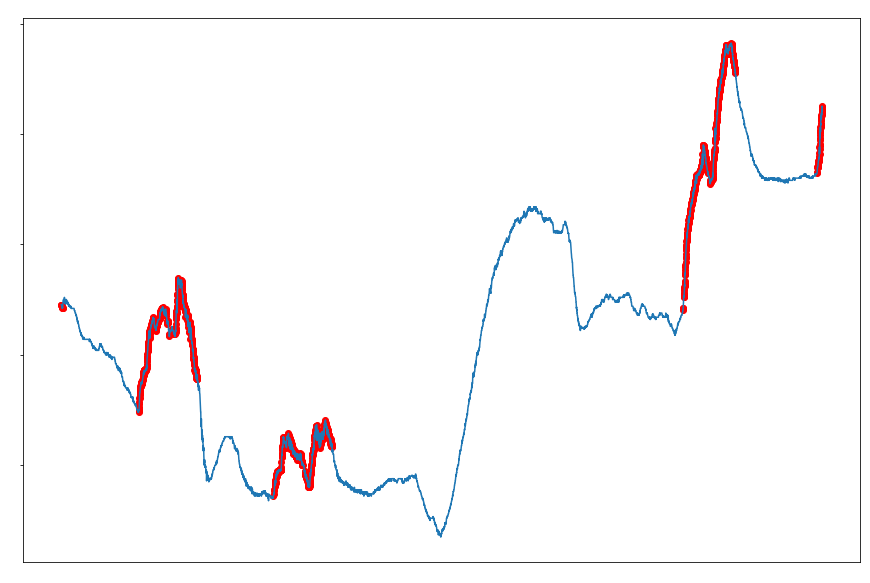

In [143]:
#occupancy_signal = df_train["Humidity"] * df_train["Occupancy"]
plt.figure(figsize=(15,10))
plt.scatter(df_train.index,occupancy_signal.values,color="red")
plt.plot(df_train.index,df_train["Humidity"])
font_propXticks = font_manager.FontProperties(size=7)
plt.locator_params(axis='x',nbins=6)
plt.xticks(rotation=50, fontproperties=font_propXticks, color="white")
plt.xlabel("Date",color="white")
plt.tick_params(
    axis='x',
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
plt.yticks(fontproperties=font_propXticks, color="white")
plt.title("Humidity time series (Training set)",fontproperties=font_propXticks, color="white")

Text(0.5, 1.0, 'Temperature time series (Training set)')

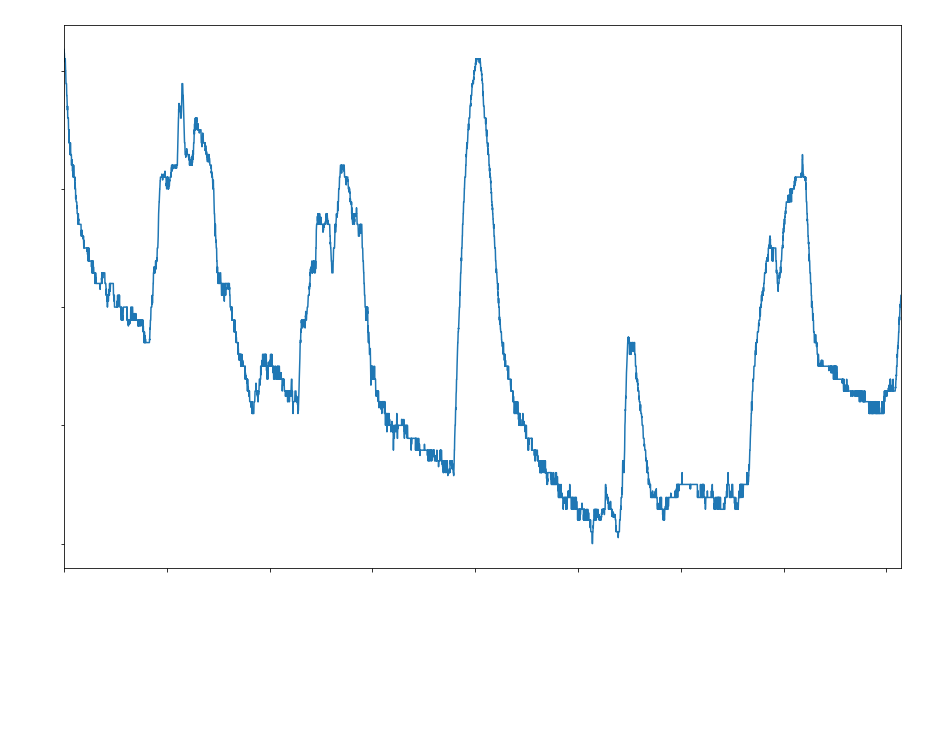

In [241]:
plt.figure(figsize=(15,10))
df_train["Temperature"].plot()
font_propXticks = font_manager.FontProperties(size=15)
plt.xticks(rotation=50, fontproperties=font_propXticks, color="white")
plt.xlabel("date",color="white",fontproperties=font_propXticks)
plt.yticks(fontproperties=font_propXticks, color="white")
plt.title("Temperature time series (Training set)",fontproperties=font_propXticks, color="white")

Text(0.5, 1.0, 'Light time series (Training set)')

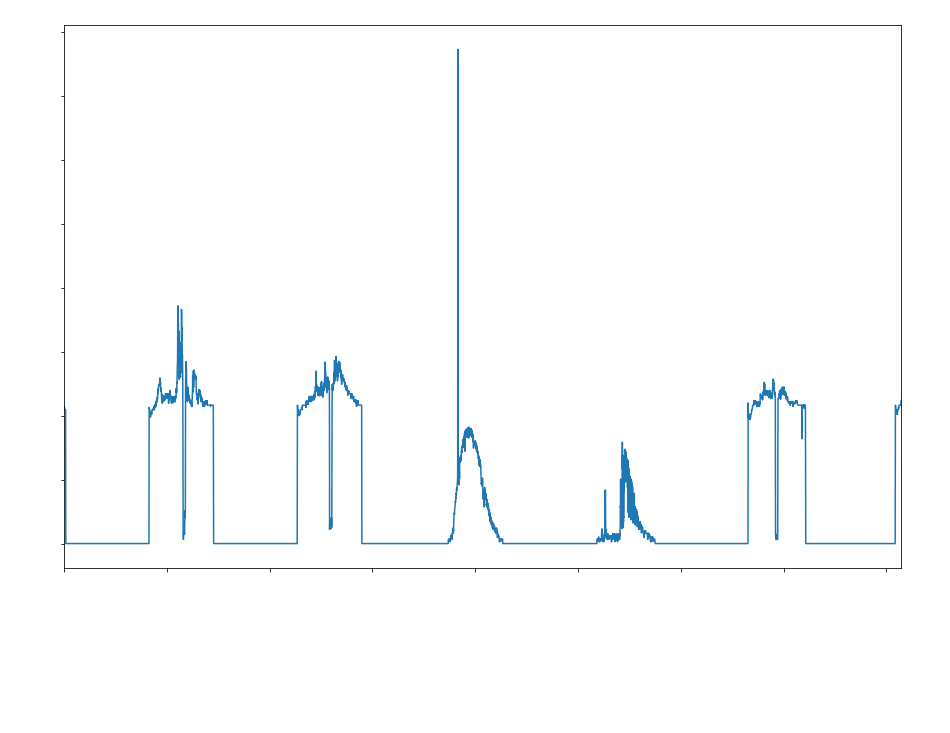

In [239]:
plt.figure(figsize=(15,10))
df_train["Light"].plot()
font_propXticks = font_manager.FontProperties(size=15)
plt.xticks(rotation=50, fontproperties=font_propXticks, color="white")
plt.yticks(fontproperties=font_propXticks, color="white")
plt.xlabel("date",color="white",fontproperties=font_propXticks)
plt.title("Light time series (Training set)",fontproperties=font_propXticks, color="white")

Text(0.5, 1.0, 'CO2 time series (Training set)')

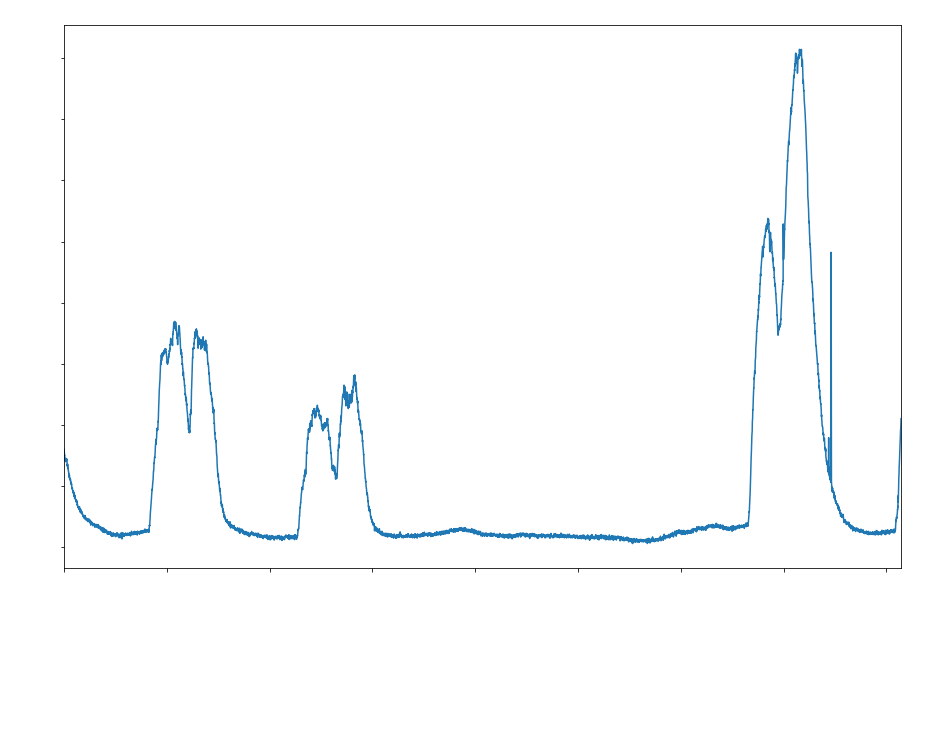

In [237]:
plt.figure(figsize=(15,10))
df_train["CO2"].plot()
font_propXticks = font_manager.FontProperties(size=15)
plt.xticks(rotation=50, fontproperties=font_propXticks, color="white")
plt.yticks(fontproperties=font_propXticks, color="white")
plt.xlabel("date",color="White", fontproperties=font_propXticks)
plt.title("CO2 time series (Training set)",fontproperties=font_propXticks, color="white")

In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 2015-02-04 17:51:00 to 2015-02-10 09:33:00
Data columns (total 6 columns):
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1)
memory usage: 765.3+ KB


In [131]:
df_train.isna().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

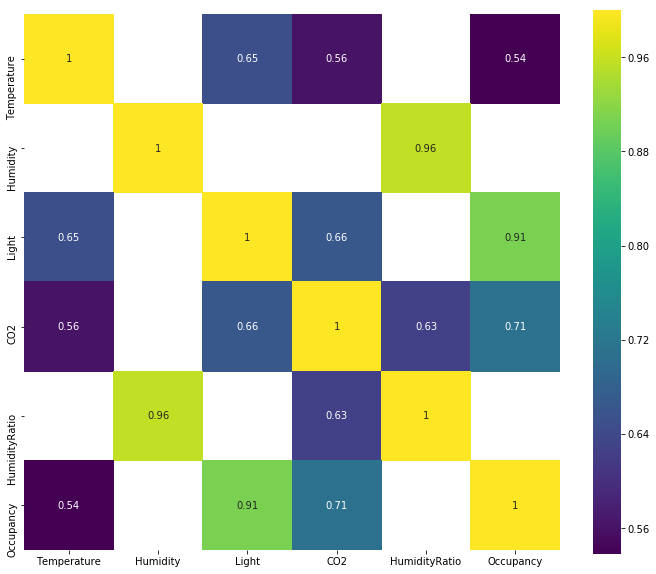

In [136]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr()[abs(df_train.corr())>=0.5],
            cmap='viridis',
            annot=True,
            square=True)

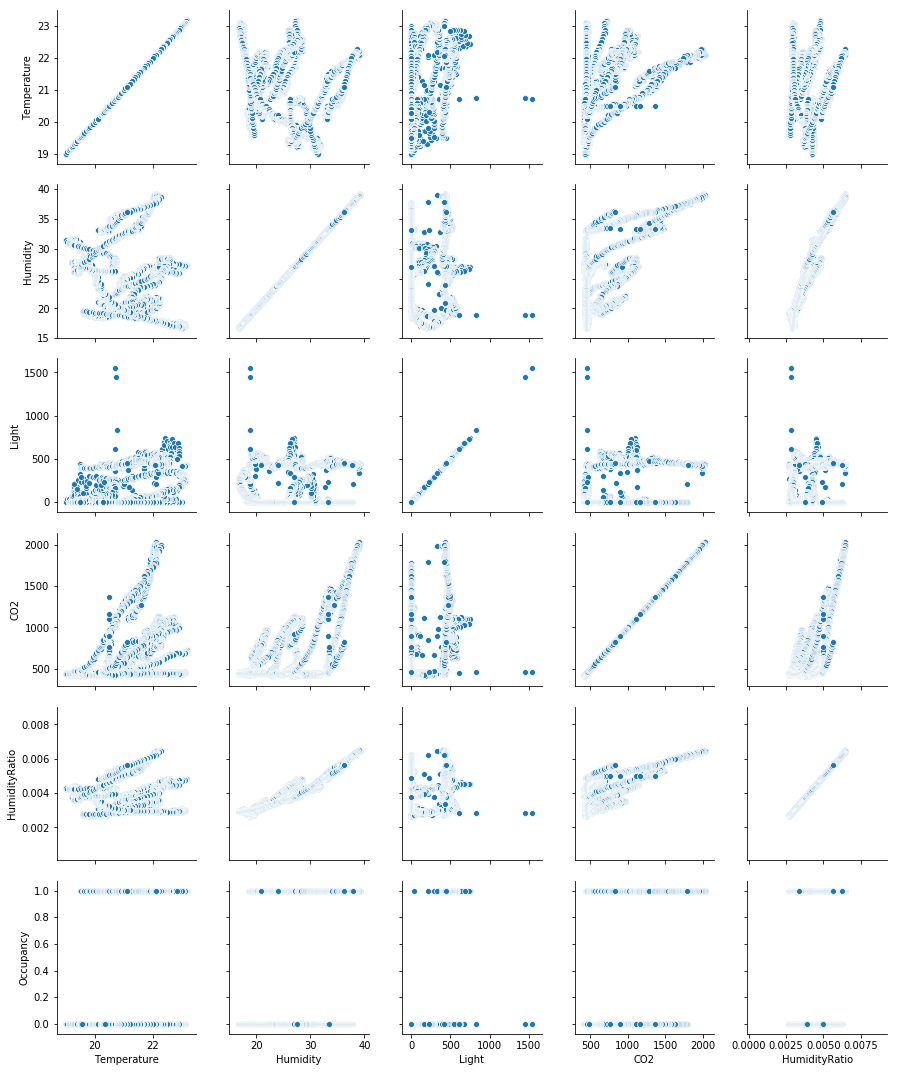

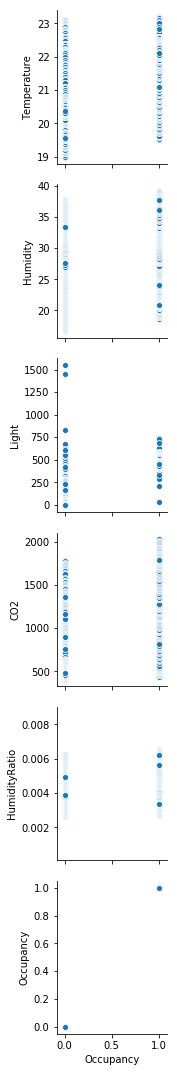

In [142]:
for i in range(0, len(df_train.columns), 5):
    sns.pairplot(data=df_train,
                x_vars=df_train.columns[i:i+5],
                y_vars=['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy'])

In [270]:
x,y = df_train.drop("Occupancy",axis=1), df_train["Occupancy"]
x_test,y_test = df_test.drop("Occupancy", axis=1), df_test["Occupancy"]
x_val, y_val = df_validation.drop("Occupancy",axis=1), df_validation["Occupancy"]
X_train,X_test, Y_train,Y_test = x[:int(len(x)*0.8)],x[int(len(x)*0.8):], y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

In [252]:
model = RandomForestClassifier(n_estimators=1000, n_jobs=-1,bootstrap=False)
model.fit(x,y)
model.score(x_test,y_test)

0.9606003752345216

In [259]:
#==================Confusion matrix for Random Forest=================
y_pred_RF = model.predict(x_test)
conf_matrix_RF = confusion_matrix(y_test,y_pred_RF)

In [248]:
model_xgb = XGBClassifier(n_estimators=1000, n_jobs=-1,learning_rate=0.4)
model_xgb.fit(x,y,early_stopping_rounds=5,eval_set=[(x_test,y_test)])

[0]	validation_0-error:0.021764
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.021764
[2]	validation_0-error:0.035272
[3]	validation_0-error:0.078424
[4]	validation_0-error:0.061538
[5]	validation_0-error:0.061538
Stopping. Best iteration:
[0]	validation_0-error:0.021764



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [273]:
#==========================Confusion matrix for XGBoost================
y_pred = model_xgb.predict(x_test)
score = f1_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
print("XGBoost classifier model prediction on test set :",round(score*100,2),"%")

XGBoost classifier model prediction on test set : 97.09 %


Text(0.5, 1.0, 'Feature Importance to predict occupancy')

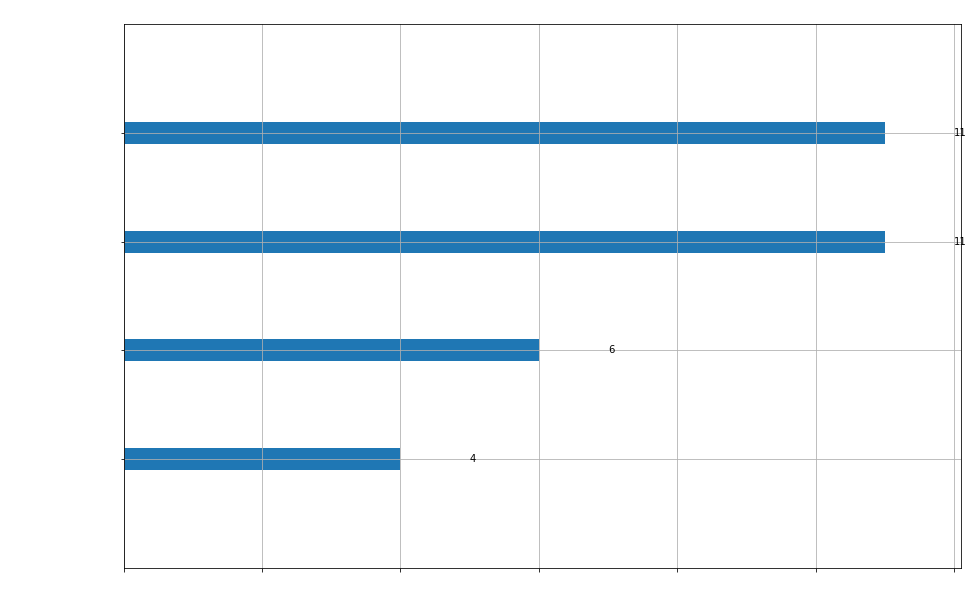

In [257]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
plot_importance(model_xgb, ax=ax)

font_prop_xticks = font_manager.FontProperties(size=10)
font_prop_title = font_manager.FontProperties(size=14)
plt.xticks(fontproperties = font_prop_xticks, color="white")
plt.yticks(fontproperties=font_prop_title, color="white")
plt.xlabel("Feature importance score",color="white",fontproperties=font_prop_title)
plt.ylabel("Features",color="white",fontproperties=font_prop_title)
plt.title("Feature Importance to predict occupancy", fontproperties=font_prop_title, color="white")

In [258]:
#confusion matrix for XGBoost
conf_matrix

array([[1640,   53],
       [   5,  967]], dtype=int64)

In [260]:
#confusion matrix for random forest
conf_matrix_RF

array([[1635,   58],
       [  47,  925]], dtype=int64)

In [272]:
#=======================Test du modèle XGBoost sur le jeu de validation================
y_pred2 = model_xgb.predict(x_val)
score_valXGB = f1_score(y_val,y_pred2)
conf_matrix_valXGB = confusion_matrix(y_val,y_pred2)
print("XGBoost classifier model prediction on validation set :",round(score*100,2),"%")

XGBoost classifier model prediction on validation set : 97.09 %


In [274]:
conf_matrix_valXGB

array([[7648,   55],
       [  12, 2037]], dtype=int64)

In [278]:
#==================Confusion matrix for Random Forest=================
score_va_RF = model.score(x_val,y_val)
y_pred_valRF = model.predict(x_val)
conf_matrix_valRF = confusion_matrix(y_val,y_pred_valRF)
print("Random forest classifier F1-score on validation set : ", round(score_va_RF*100,2),"%")

Random forest classifier F1-score on validation set :  96.19 %


In [279]:
conf_matrix_valRF

array([[7421,  282],
       [  90, 1959]], dtype=int64)

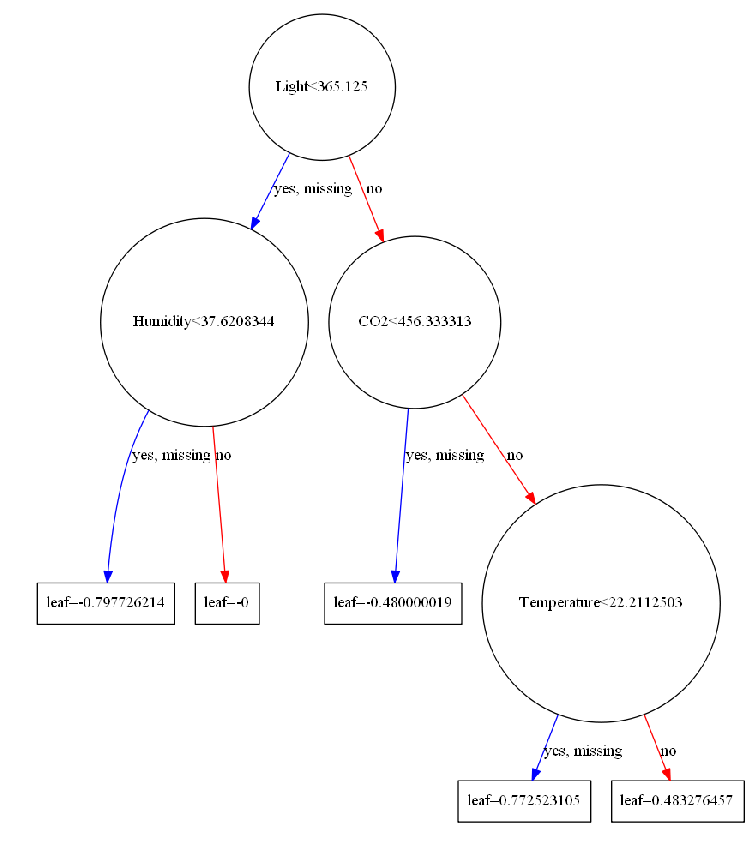

In [286]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
plot_tree(model_xgb,ax=ax)